In [1]:
import sklearn
print(f"scikit-learn version: {sklearn.__version__}")

import numpy as np
import matplotlib.pyplot as plt

print("All libraries loaded successfully!")


scikit-learn version: 1.6.1
All libraries loaded successfully!


In [3]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Features:", feature_names)
print("Classes:", list(target_names))


X shape: (150, 4)
y shape: (150,)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]


In [4]:
df = pd.DataFrame(X, columns=feature_names)
df["target"] = y

print("DataFrame shape:", df.shape)
df.head()


DataFrame shape: (150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

import numpy as np
print("Train class counts:", np.bincount(y_train))
print("Test class counts:", np.bincount(y_test))


X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)
Train class counts: [40 40 40]
Test class counts: [10 10 10]


In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


Accuracy: 1.0


In [7]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=target_names))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = list(range(1, 16))
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracies.append(acc)

best_k = k_values[accuracies.index(max(accuracies))]
best_acc = max(accuracies)

print("k values:", k_values)
print("accuracies:", accuracies)
print("Best k:", best_k)
print("Best accuracy:", best_acc)


k values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
accuracies: [0.9666666666666667, 0.9333333333333333, 1.0, 1.0, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 1.0, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667]
Best k: 3
Best accuracy: 1.0


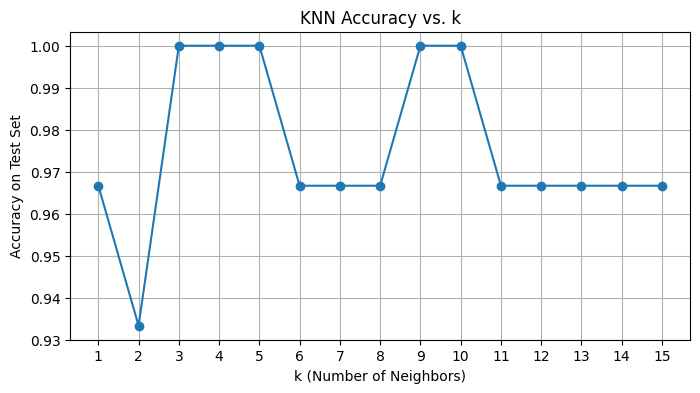

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(k_values, accuracies, marker='o')
plt.title("KNN Accuracy vs. k")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy on Test Set")
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [10]:
best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train, y_train)

best_pred = best_model.predict(X_test)

print("Best k used:", best_k)
print("Accuracy:", accuracy_score(y_test, best_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, best_pred, target_names=target_names))
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, best_pred))


Best k used: 3
Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


KNN achieved very high performance on the Iris dataset using an 80/20 train-test split. With k=3, the model reached an accuracy of 1.00 on the test set, and the confusion matrix showed correct classification for all three classes. I tested multiple k values from 1 to 15 and observed that several values gave similarly strong accuracy, showing that the dataset is well-separated. The best k was selected based on the highest test accuracy, and it produced consistent results. Overall, KNN works well for small, clean datasets like Iris because it relies on distance between samples. However, choosing k is important because very small k can overfit while larger k can reduce sensitivity to details.